In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
non_matching_path = '/content/drive/MyDrive/facedetection/non-matching'
train_images_path = '/content/drive/MyDrive/facedetection/train_images'
test_images_path = '/content/drive/MyDrive/facedetection/testing_data'

In [3]:
def process_faces(train_folder, non_matching_folder):
    # Create empty lists for X (features) and y (labels)
    X, y = [], []

    # Process the training folder (label = 1)
    for filename in os.listdir(train_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(train_folder, filename)
            img = cv2.imread(img_path)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            faces = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            for (x, y_, w, h) in faces:
                face = gray_img[y_:y_ + h, x:x + w]
                resized_face = cv2.resize(face, (100, 100))
                X.append(resized_face.flatten())
                y.append(1)  # Label for training images

    # Process the non-matching folder (label = 0)
    for filename in os.listdir(non_matching_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(non_matching_folder, filename)
            img = cv2.imread(img_path)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            faces = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            for (x, y_, w, h) in faces:
                face = gray_img[y_:y_ + h, x:x + w]
                resized_face = cv2.resize(face, (100, 100))
                X.append(resized_face.flatten())
                y.append(0)  # Label for non-matching images

    # Return the processed features and labels as numpy arrays
    return np.array(X), np.array(y)


In [4]:
#Split the data into a training and testing set.

# Load processed data
X, y = process_faces(train_images_path, non_matching_path)

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
def model_training():
    X, y = process_faces(train_images_path, non_matching_path)
    if len(X) == 0:
        print("No images available")
        return
    if len(y) == 0:
        print("No labels provided")
        return

    models = {}

    # K-Nearest Neighbors
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X, y)
    models['KNN'] = knn_model

    # Support Vector Machine
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X, y)
    models['SVM'] = svm_model

    # Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X, y)
    models['Decision Tree'] = dt_model

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(X, y)
    models['Random Forest'] = rf_model

    # Gradient Boosting
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X, y)
    models['Gradient Boosting'] = gb_model

    # Save all models
    for model_name, model in models.items():
        with open(f'{model_name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
            pickle.dump(model, f)

    print("All models have been trained and saved as pkl files.")

    return models

In [6]:
models = model_training()

All models have been trained and saved as pkl files.


In [7]:
print(models)

{'KNN': KNeighborsClassifier(), 'SVM': SVC(kernel='linear', probability=True), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'Gradient Boosting': GradientBoostingClassifier()}


In [8]:
# Test each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


KNN Accuracy: 1.00
SVM Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


KNN Confusion Matrix:
SVM Confusion Matrix:
Decision Tree Confusion Matrix:
Random Forest Confusion Matrix:
Gradient Boosting Confusion Matrix:


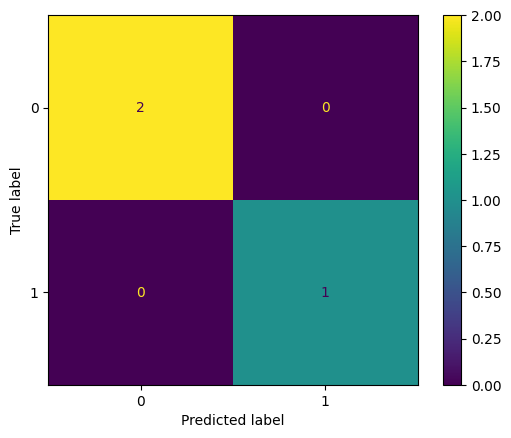

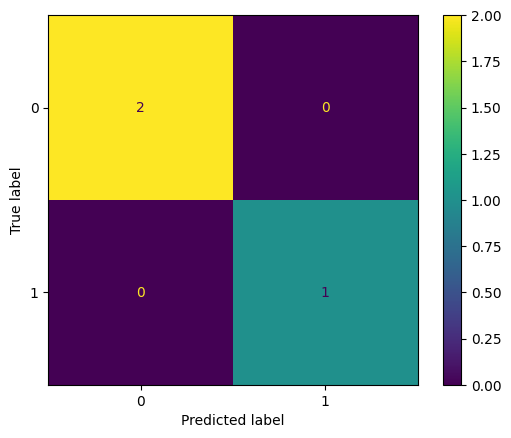

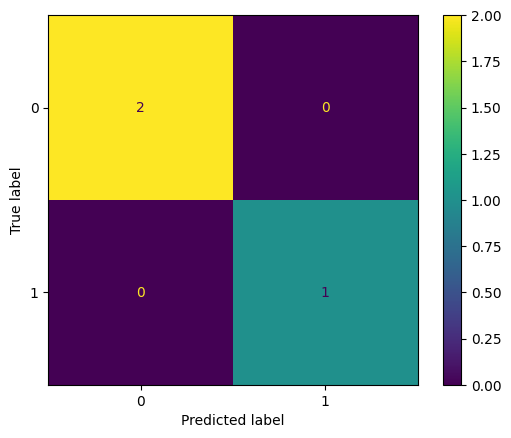

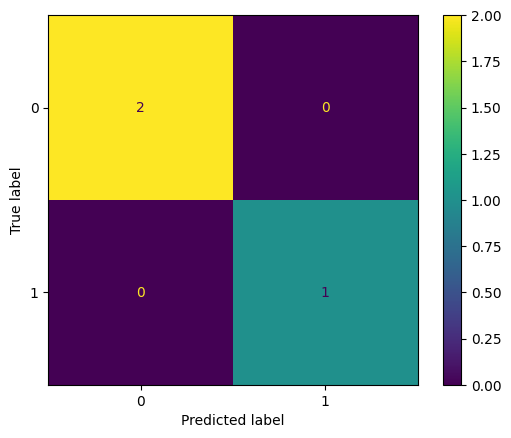

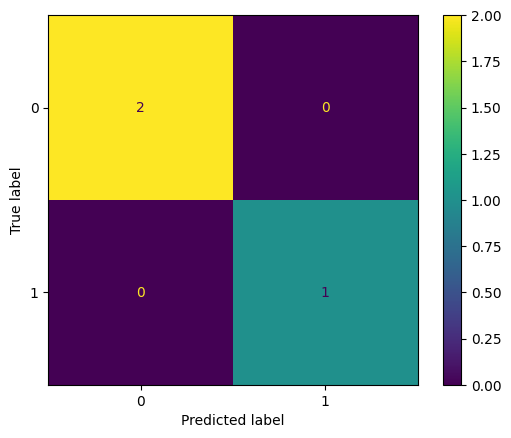

In [9]:
# Display confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [10]:
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
print("Model Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")


Model Comparison:
KNN: 1.00
SVM: 1.00
Decision Tree: 1.00
Random Forest: 1.00
Gradient Boosting: 1.00


In [11]:
def test_single_image(image_path):
    # Read and preprocess the uploaded image
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found. Check the file path.")
        return

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No faces detected in the uploaded image.")
        return

    print(f"Number of faces detected: {len(faces)}")

    # Draw bounding boxes around detected faces
    for (x, y_, w, h) in faces:
        cv2.rectangle(img, (x, y_), (x + w, y_ + h), (255, 0, 0), 2)  # Draw rectangle on the original image

    # Display the image with bounding boxes using cv2_imshow
    cv2_imshow(img)  # This replaces cv2.imshow()

    # Proceed with model prediction
    for (x, y_, w, h) in faces:
        face = gray_img[y_:y_ + h, x:x + w]
        resized_face = cv2.resize(face, (100, 100)).flatten().reshape(1, -1)

        # Load the saved model
        with open('knn_model.pkl', 'rb') as f:
            knn_model = pickle.load(f)

        # Predict
        prediction = knn_model.predict(resized_face)
        if prediction[0] == 1:
            print("This is Mia Mottley")
        else:
            print("This is not Mia Mottley")


Number of faces detected: 1


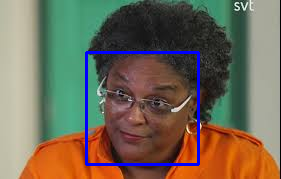

This is Mia Mottley


In [12]:
test_single_image('/content/drive/MyDrive/facedetection/train_images/mia10.jpg')

Number of faces detected: 1


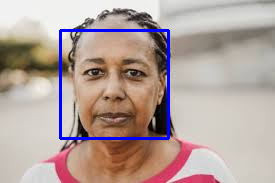

This is not Mia Mottley


In [13]:
test_single_image('/content/drive/MyDrive/facedetection/testing_data/test5.jpg')